### This notebook will be mainly used for the capstone project!

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Capstone Project
### Introduction / Business Problem - Possible Upgrade to Canadian 911 Services in Toronto


Under provincial jurisdinction, the operation of the 911 servicies is practiced by the hands of local police, paramedics or firefighting authorities. The internationally accepted standard for answering 911 calls suggests 90% of all calls should be picked up within 10 seconds, or 95% calls should be answered within 20 seconds even during the busiest time of day. There has been many attempts to solve a common, yet the most important, problem of the 911 service in Toronto. When there is a large volume of calls are coming at once, there is a significant 911 wait times at the communication centre (maximum  wait time up to 5 minutes), leading many dalays in police, paramedic, and firefigther dispatch. It has been reported that nearly 1 in 5 calls to 911 in York Region so far in 2017 were unintentional. 

This project will analyze information based on what is sent to the Ontario Fire Marshal relating to all incidents to which Toronto Fire responds. The type and frequency of all incidents will be categorized by the regions in and around the city of Toronto. The conclusion may help determining the number of hiring more call operators or providing ideas which regions the communication centre or the 911 control headquater should put more focus in order to reduce the wait time on 911 calls.

### Description of the dataset
#### Fire Incidents Data - Only 'Fire' type incidents in 2017
#### Fire Station x_y - locations of the fire station in Toronto (lat, lon)
#### 2017 Basic Incident Details - All incidents reported from 911 calls in 2017

In [85]:

body = client_f69201212057400d81a8ccf92a933923.get_object(Bucket='couseracapstone-donotdelete-pr-saosut8th7aqnw',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
post_df=df_data_4
post_df.head()



,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [86]:
post_df.rename(columns ={'Postal Code':'Postcode'}, inplace=True)

In [87]:

body = client_f69201212057400d81a8ccf92a933923.get_object(Bucket='couseracapstone-donotdelete-pr-saosut8th7aqnw',Key='toronto.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
toronto_df=df_data_5
toronto_df.head()


,Postcode,Borough,Neighbourhood
0,M5R,Central Toronto,Yorkville
1,M3J,North York,York University
2,M2P,North York,York Mills West
3,M2L,North York,York Mills
4,M4C,East York,Woodbine Heights


In [111]:
# Post code area
toronto_df.drop(toronto_df[toronto_df['Borough'] == "Not assigned"].index, inplace = True)
new_df = toronto_df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(lambda x: ','.join(x)).reset_index()
post_df = pd.merge(new_df, post_df, on='Postcode')
post_df.head(50)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"West Hill,Morningside,Guildwood",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park,Ionview,East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Oakridge,Golden Mile,Clairlea",43.711112,-79.284577
8,M1M,Scarborough,"Scarborough Village West,Cliffside,Cliffcrest",43.716316,-79.239476
9,M1N,Scarborough,"Cliffside West,Birch Cliff",43.692657,-79.264848


In [128]:
post_df.dtypes

Postcode          object
Borough           object
Neighbourhood     object
Latitude         float64
Longitude        float64
dtype: object

In [89]:
# All 911 calls in 2019
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_f69201212057400d81a8ccf92a933923 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TyIT425KrwaU5k2b0rVJLOTYm3WfhGUBN4qYNWPixtgA',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f69201212057400d81a8ccf92a933923.get_object(Bucket='couseracapstone-donotdelete-pr-saosut8th7aqnw',Key='2017_Basic_Incident_Details.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
call_df = df_data_1
call_df.dtypes



Incident Number                 object
Initial CAD Event Type          object
Initial CAD Event Call Type     object
Final Incident Type             object
Event Alarm Level                int64
Call Source                     object
Incident Station Area          float64
Incident Ward                    int64
LATITUDE                       float64
Longitude                      float64
Intersection                    object
TFS Alarm Time                  object
TFS Arrival Time                object
Last TFS Unit Clear Time        object
Persons Rescued                float64
dtype: object

In [90]:
# check for missing values
call_df.isnull().sum()[call_df.isnull().any()==True]

Final Incident Type         6
Call Source                 8
Incident Station Area       3
LATITUDE                    2
Longitude                   2
Intersection                2
TFS Arrival Time         1771
Persons Rescued             8
dtype: int64

In [91]:
call_df.shape

(61779, 15)

In [92]:
call_df.dropna(subset=['Final Incident Type'], inplace=True)
call_df.dropna(subset=['Incident Station Area'], inplace=True)
call_df.dropna(subset=['LATITUDE'], inplace=True)
call_df.dropna(subset=['Longitude'], inplace=True)

call_df.shape


(61768, 15)

In [93]:
call_df.rename(columns = {'Incident Station Area':'station_id'}, inplace=True)
call_df.dtypes

Incident Number                 object
Initial CAD Event Type          object
Initial CAD Event Call Type     object
Final Incident Type             object
Event Alarm Level                int64
Call Source                     object
station_id                     float64
Incident Ward                    int64
LATITUDE                       float64
Longitude                      float64
Intersection                    object
TFS Alarm Time                  object
TFS Arrival Time                object
Last TFS Unit Clear Time        object
Persons Rescued                float64
dtype: object

In [94]:
# Fire Station Location
body = client_f69201212057400d81a8ccf92a933923.get_object(Bucket='couseracapstone-donotdelete-pr-saosut8th7aqnw',Key='fire station x_y.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
station_df = df_data_2

station_df.station_id = station_df.station_id.astype(float)

station_df.head()

,station_id,East,North,Latitude,Longitude
0,111.0,629254.562,4849606.500,43.788230,-79.393539
1,112.0,625241.895,4847922.113,43.773760,-79.443786
2,113.0,632675.000,4849871.000,43.790005,-79.350979
3,114.0,627526.500,4847651.500,43.770934,-79.415473
4,115.0,633496.245,4847881.079,43.771948,-79.341271


In [95]:
station_df.rename(columns = {'Latitude':'st_lat', 'Longitude':'st_lon'}, inplace=True)

In [107]:
# Merging fire station dataframe with call reasion on 'station_id'
to_df = pd.merge(call_df, station_df, on= 'station_id')

In [113]:
to_df.head()

,Incident Number,Initial CAD Event Type,Initial CAD Event Call Type,Final Incident Type,Event Alarm Level,Call Source,station_id,Incident Ward,LATITUDE,Longitude,Intersection,TFS Alarm Time,TFS Arrival Time,Last TFS Unit Clear Time,Persons Rescued,East,North,st_lat,st_lon
0,F17007479,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,344.0,11,43.664088,-79.415992,Bloor St W / Manning Ave,1/23/2017 7:24,NaN,1/23/2017 7:41,0.0,628033.938,4836538.0,43.670819,-79.411816
1,F17009854,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,344.0,11,43.666657,-79.403871,Spadina Ave / Bloor St W / Spadina Rd,1/30/2017 20:32,NaN,1/30/2017 20:34,0.0,628033.938,4836538.0,43.670819,-79.411816
2,F17010015,FAR - Alarm Residential,Emergency Fire,35 - Human - Accidental (alarm accidentally ac...,0,05 - Telephone from Monitoring Agency,344.0,12,43.677417,-79.408131,Spadina Rd / Davenport Rd,1/31/2017 10:35,1/31/2017 10:39,1/31/2017 10:46,0.0,628033.938,4836538.0,43.670819,-79.411816
3,F17010033,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,344.0,11,43.670309,-79.405305,Spadina Rd / Kendal Ave,1/31/2017 11:26,1/31/2017 11:30,1/31/2017 11:50,0.0,628033.938,4836538.0,43.670819,-79.411816
4,F17010048,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,344.0,11,43.668114,-79.412384,Bathurst St / Barton Ave,1/31/2017 12:15,1/31/2017 12:18,1/31/2017 12:51,0.0,628033.938,4836538.0,43.670819,-79.411816


In [114]:
to_df.loc[to_df['Intersection'] == 'Dundas St E / Sherbourne St']

,Incident Number,Initial CAD Event Type,Initial CAD Event Call Type,Final Incident Type,Event Alarm Level,Call Source,station_id,Incident Ward,LATITUDE,Longitude,Intersection,TFS Alarm Time,TFS Arrival Time,Last TFS Unit Clear Time,Persons Rescued,East,North,st_lat,st_lon
27589,F17009910,FAR - Alarm Residential,Emergency Fire,32 - Alarm System Equipment - Accidental activ...,0,05 - Telephone from Monitoring Agency,325.0,13,43.658295,-79.371032,Dundas St E / Sherbourne St,1/31/2017 0:38,1/31/2017 0:42,1/31/2017 0:50,0.0,631818.25,4835138.5,43.657562,-79.365234
27597,F17010086,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,325.0,13,43.658295,-79.371032,Dundas St E / Sherbourne St,1/31/2017 14:24,1/31/2017 14:27,1/31/2017 14:40,0.0,631818.25,4835138.5,43.657562,-79.365234
27600,F17010229,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,325.0,13,43.658295,-79.371032,Dundas St E / Sherbourne St,2/1/2017 0:14,2/1/2017 0:18,2/1/2017 0:32,0.0,631818.25,4835138.5,43.657562,-79.365234
27601,F17010250,FAHRD - Alarm Highrise Residential Downtown,Emergency Fire,"33 - Human - Malicious intent, prank",0,05 - Telephone from Monitoring Agency,325.0,13,43.658295,-79.371032,Dundas St E / Sherbourne St,2/1/2017 2:39,2/1/2017 2:43,2/1/2017 2:52,0.0,631818.25,4835138.5,43.657562,-79.365234
27608,F17010393,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,325.0,13,43.658295,-79.371032,Dundas St E / Sherbourne St,2/1/2017 14:16,2/1/2017 14:20,2/1/2017 14:27,0.0,631818.25,4835138.5,43.657562,-79.365234
27611,F17010609,FAHRD - Alarm Highrise Residential Downtown,Emergency Fire,32 - Alarm System Equipment - Accidental activ...,0,05 - Telephone from Monitoring Agency,325.0,13,43.658295,-79.371032,Dundas St E / Sherbourne St,2/2/2017 9:01,2/2/2017 9:04,2/2/2017 9:11,0.0,631818.25,4835138.5,43.657562,-79.365234
27618,F17010812,FAHRD - Alarm Highrise Residential Downtown,Emergency Fire,"33 - Human - Malicious intent, prank",0,05 - Telephone from Monitoring Agency,325.0,13,43.658295,-79.371032,Dundas St E / Sherbourne St,2/2/2017 21:52,2/2/2017 21:55,2/2/2017 22:08,0.0,631818.25,4835138.5,43.657562,-79.365234
27622,F17010894,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,325.0,13,43.658295,-79.371032,Dundas St E / Sherbourne St,2/3/2017 8:39,2/3/2017 8:42,2/3/2017 8:49,0.0,631818.25,4835138.5,43.657562,-79.365234
27629,F17011190,FAHR - Alarm Highrise Residential,Emergency Fire,35 - Human - Accidental (alarm accidentally ac...,0,05 - Telephone from Monitoring Agency,325.0,13,43.658295,-79.371032,Dundas St E / Sherbourne St,2/4/2017 5:23,2/4/2017 5:28,2/4/2017 5:35,0.0,631818.25,4835138.5,43.657562,-79.365234
27631,F17011367,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,325.0,13,43.658295,-79.371032,Dundas St E / Sherbourne St,2/4/2017 18:57,2/4/2017 19:00,2/4/2017 19:13,0.0,631818.25,4835138.5,43.657562,-79.365234


Text(0.5,1,'Top 5 Station for 911 calls')

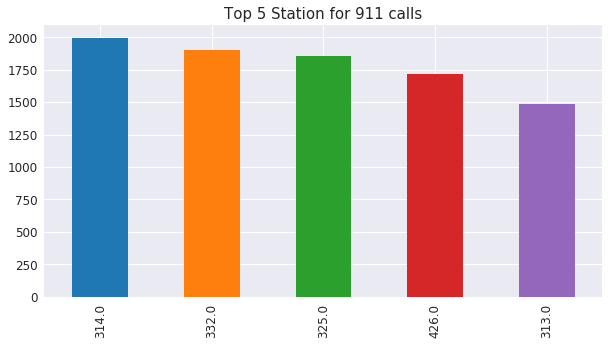

In [109]:
# 5 Top Station that are dispatched in a response for 911 calls
plt.figure(figsize=(10,5))

to_df.station_id.value_counts().head().plot(kind='bar')
plt.tick_params(axis='both',labelsize =12)
plt.title('Top 5 Station for 911 calls',fontsize=15)


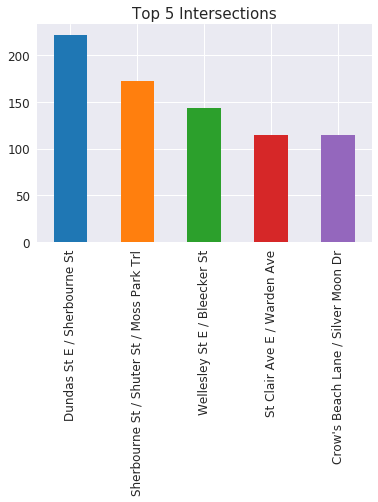

In [110]:
# 5 Top intersection
to_df.Intersection.value_counts().head().plot(kind='bar')
plt.tick_params(axis='both',labelsize =12)
plt.title('Top 5 Intersections',fontsize=15)

plt.show()

In [100]:
to_df.rename(columns = {'Final Incident Type':'call_reason'}, inplace=True)
to_df['Call_Reason'] = to_df.call_reason.apply(lambda title: title.split(':')[0])


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


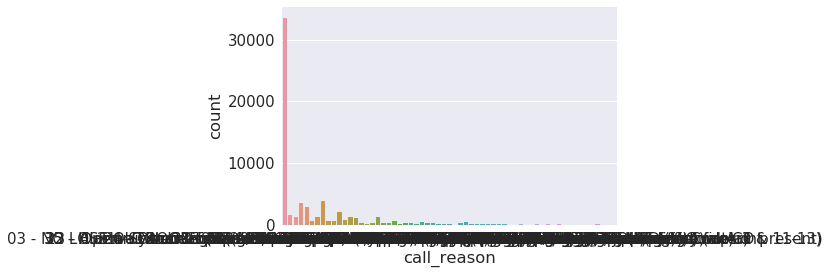

In [101]:
fig, ax = plt.subplots()
sns.countplot('call_reason',data=to_df,ax=ax)
plt.show()


In [127]:
post_df.loc[(post_df['Latitude'] == 43.658295 & post_df['Longitude'] == -79.545677)]

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [125]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    geopy-1.19.0               |             py_0          53 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.19.0-py_0       conda-forge

The following packages will be UPDATED:

   